<a href="https://colab.research.google.com/github/Housenkan/ChallengeAluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from math import *
import numpy as np

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"


loja0 = pd.read_csv(url)
loja1 = pd.read_csv(url2)
loja2 = pd.read_csv(url3)
loja3 = pd.read_csv(url4)

loja0.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [11]:
lojas = [loja0, loja1, loja2, loja3]
faturamento_cada_loja = []
numero_loja = []
for i, loja in enumerate(lojas):
  faturamento_loja = pd.DataFrame(loja)
  faturamento_total_loja = round(sum(faturamento_loja['Preço']), 2)
  faturamento_cada_loja.append(faturamento_total_loja)
  numero_loja.append(i)
  print(f'A loja{i} teve o faturamento de {faturamento_total_loja}')



A loja0 teve o faturamento de 1534509.12
A loja1 teve o faturamento de 1488459.06
A loja2 teve o faturamento de 1464025.03
A loja3 teve o faturamento de 1384497.58


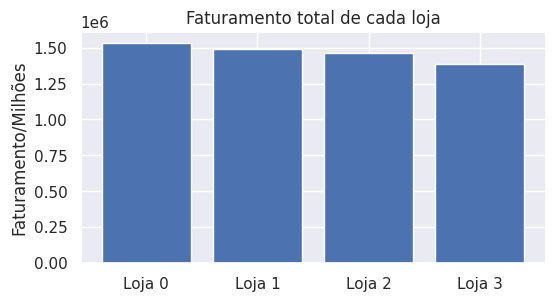

Faturamento da loja0 é igual à 1534509.12
Faturamento da loja1 é igual à 1488459.06
Faturamento da loja2 é igual à 1464025.03
Faturamento da loja3 é igual à 1384497.58


In [62]:
plt.figure(figsize = (6, 3))
plt.title('Faturamento total de cada loja')
plt.bar(numero_loja, faturamento_cada_loja)
plt.xticks(numero_loja, ['Loja 0', 'Loja 1', 'Loja 2', 'Loja 3'])
plt.ylabel('Faturamento/Milhões')
plt.show()

for i, faturamento in enumerate(faturamento_cada_loja):
  print(f'Faturamento da loja{i} é igual à {faturamento}')

# 2. Vendas por Categoria


In [64]:

qtd_produtos_por_categoria_df = []
for i, loja in enumerate(lojas):
  categorias_produtos = loja['Categoria do Produto'].value_counts()
  categorias_produtos_df = categorias_produtos.reset_index()
  categorias_produtos_df.columns = ['Categoria do Produto', 'Quantidade de Vendas']
  qtd_produtos_por_categoria_df.append(categorias_produtos_df)
  print(f'loja{i}')
  display(categorias_produtos_df)



loja0


,Categoria do Produto,Quantidade de Vendas
0,moveis,465
1,eletronicos,448
2,brinquedos,324
3,eletrodomesticos,312
4,esporte e lazer,284
5,instrumentos musicais,182
6,livros,173
7,utilidades domesticas,171


loja1


,Categoria do Produto,Quantidade de Vendas
0,moveis,442
1,eletronicos,422
2,brinquedos,313
3,eletrodomesticos,305
4,esporte e lazer,275
5,instrumentos musicais,224
6,livros,197
7,utilidades domesticas,181


loja2


,Categoria do Produto,Quantidade de Vendas
0,moveis,499
1,eletronicos,451
2,brinquedos,315
3,eletrodomesticos,278
4,esporte e lazer,277
5,livros,185
6,instrumentos musicais,177
7,utilidades domesticas,177


loja3


,Categoria do Produto,Quantidade de Vendas
0,moveis,480
1,eletronicos,451
2,brinquedos,338
3,esporte e lazer,277
4,eletrodomesticos,254
5,utilidades domesticas,201
6,livros,187
7,instrumentos musicais,170


Text(0.5, 1.0, 'Loja 3 ')

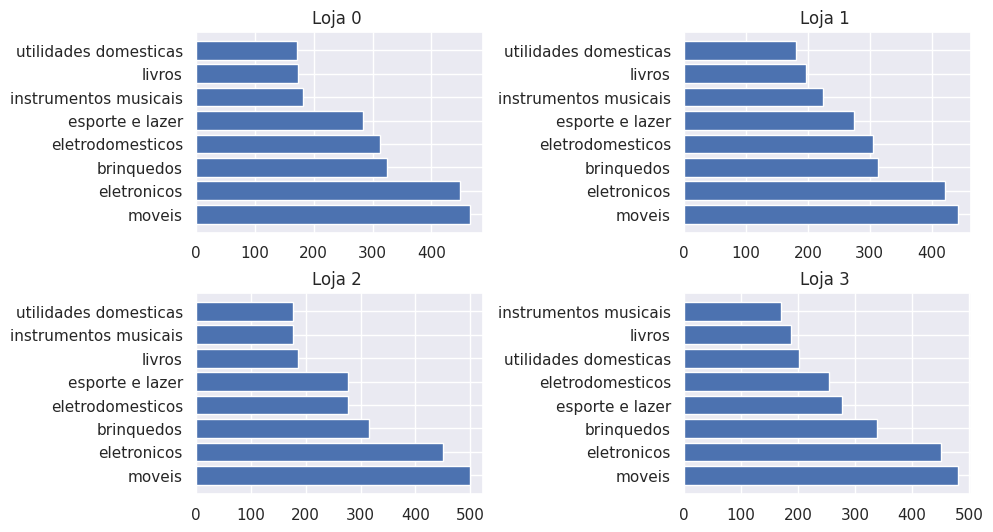

In [14]:
sns.set_theme()

fig, axs = plt.subplots(2,2, figsize=(10,6))
fig.subplots_adjust(hspace=0.3, wspace=0.7)
axs[0,0].barh(qtd_produtos_por_categoria_df[0]['Categoria do Produto'], qtd_produtos_por_categoria_df[0]['Quantidade de Vendas'])
axs[0,0].set_title('Loja 0 ')

axs[0,1].barh(qtd_produtos_por_categoria_df[1]['Categoria do Produto'], qtd_produtos_por_categoria_df[1]['Quantidade de Vendas'])
axs[0,1].set_title('Loja 1 ')

axs[1,0].barh(qtd_produtos_por_categoria_df[2]['Categoria do Produto'], qtd_produtos_por_categoria_df[2]['Quantidade de Vendas'])
axs[1,0].set_title('Loja 2 ')

axs[1,1].barh(qtd_produtos_por_categoria_df[3]['Categoria do Produto'], qtd_produtos_por_categoria_df[3]['Quantidade de Vendas'])
axs[1,1].set_title('Loja 3 ')

# 3. Média de Avaliação das Lojas

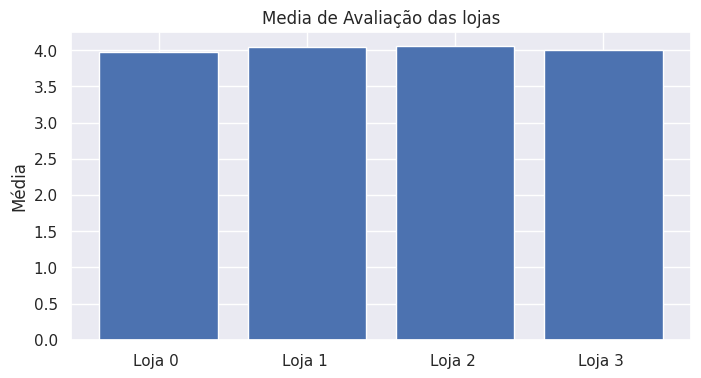

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


In [15]:
media_lojas = []
for i, media in enumerate(lojas):
  sats_cliente = round(media['Avaliação da compra'].mean(), 2)
  media_lojas.append(sats_cliente)

plt.figure(figsize=(8,4))
plt.title('Media de Avaliação das lojas')
plt.bar(numero_loja, media_lojas)
plt.xticks(numero_loja, ['Loja 0 ', 'Loja 1 ', 'Loja 2 ', 'Loja 3 '])
plt.ylabel('Média')
plt.show()

print(media_lojas)


# 4. Produtos Mais e Menos Vendidos

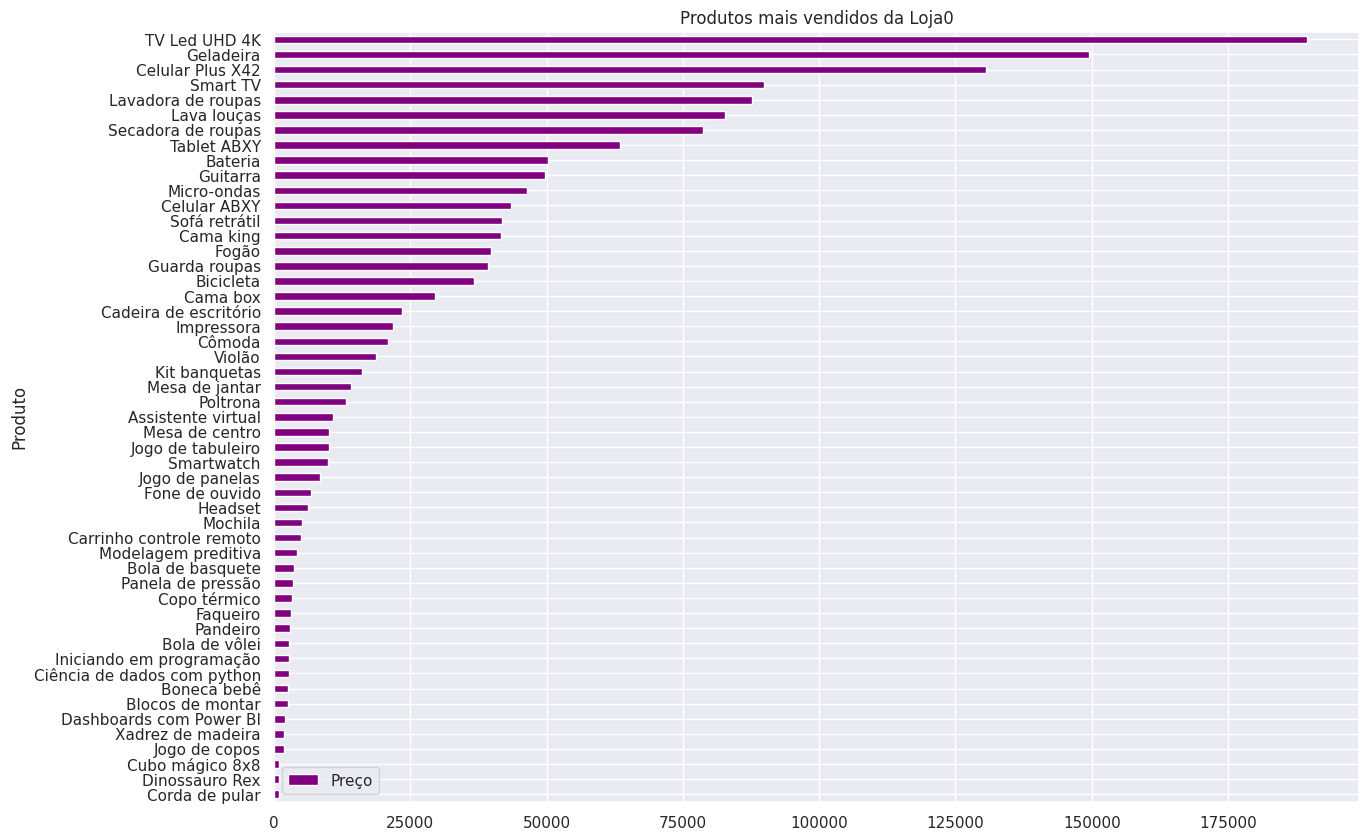

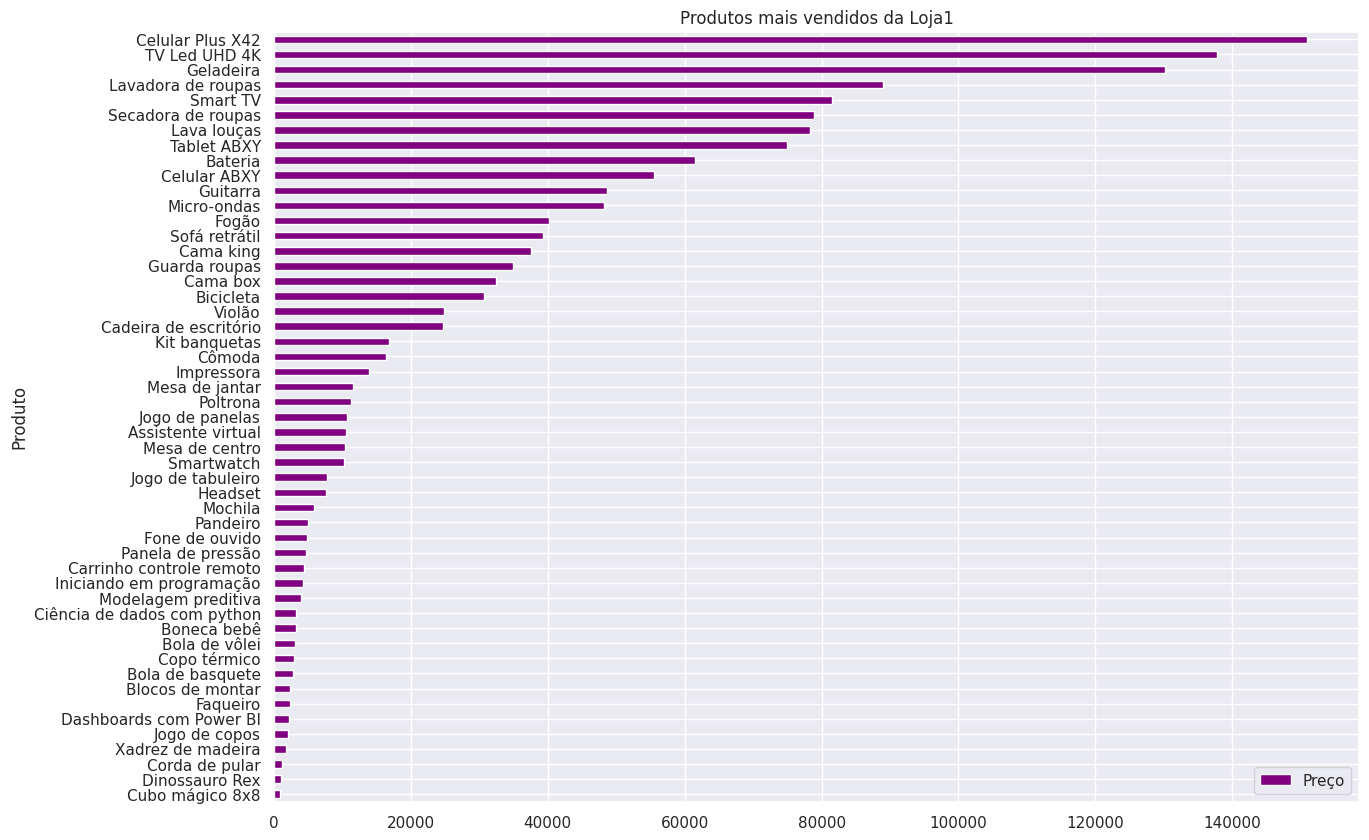

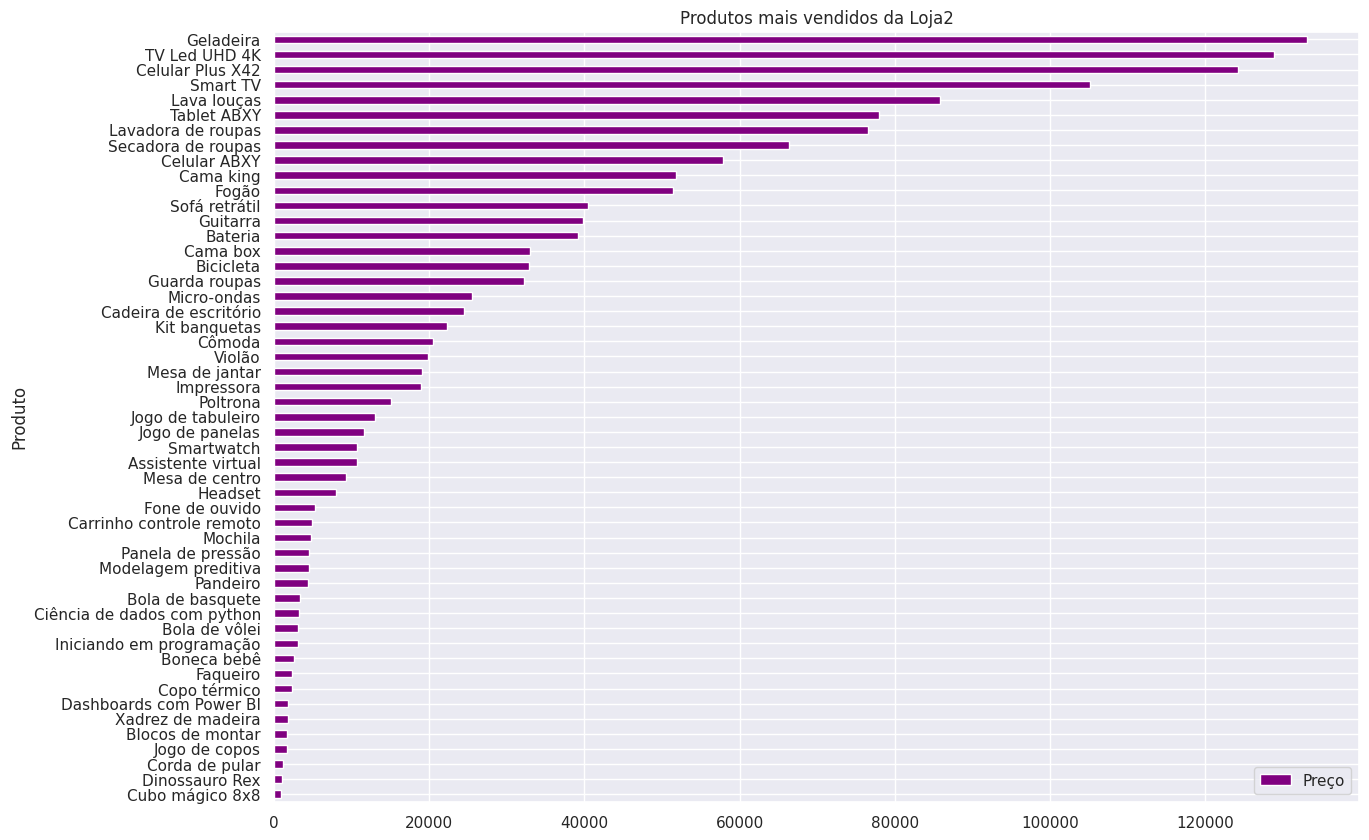

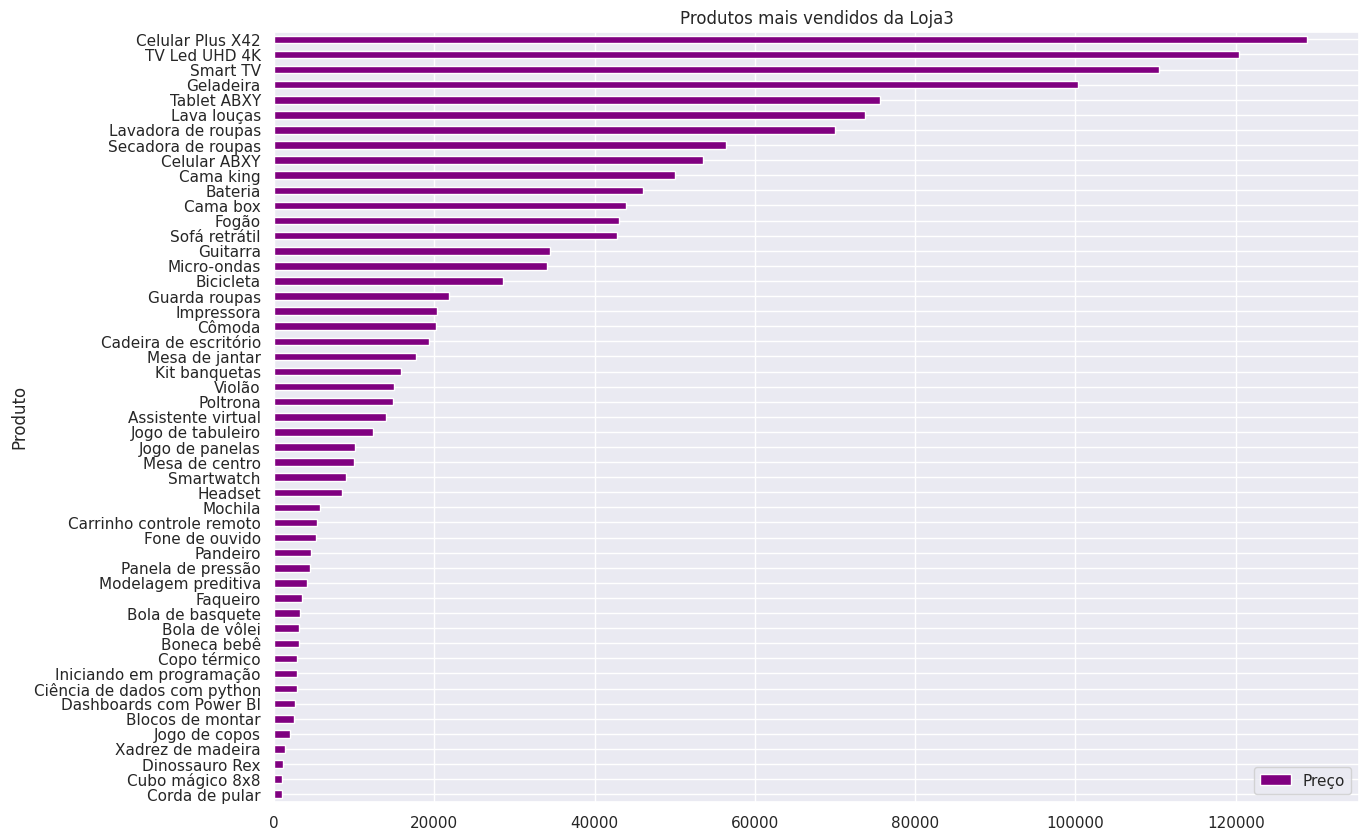

In [41]:
for i, loja in enumerate(lojas):
  prod_mais_vend = pd.DataFrame(loja.groupby('Produto')[['Preço']].sum().sort_values('Preço'))
  df_prod_mais_vend = prod_mais_vend.reset_index()
  df_prod_mais_vend.columns = ['Produto', 'Preço']
  prod_mais_vend.plot(kind = 'barh', figsize=(14,10), color = 'purple')
  plt.title(f'Produtos mais vendidos da Loja{i}')

# 5. Frete Médio por Loja


O frete da loja0(em média) é igual a 34.69
O frete da loja1(em média) é igual a 33.62
O frete da loja2(em média) é igual a 33.07
O frete da loja3(em média) é igual a 31.28


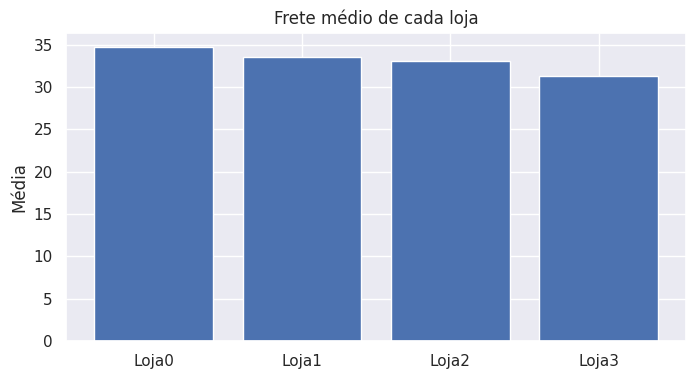

In [66]:
for i, loja in enumerate(lojas):
  frete_medio = round(loja['Frete'].mean(), 2)
  print(f'O frete da loja{i}(em média) é igual a {frete_medio}')

plt.figure(figsize=(8,4))
plt.title(f'Frete médio de cada loja')
plt.bar(numero_loja, [round(loja['Frete'].mean(), 2) for loja in lojas])
plt.xticks(numero_loja, ['Loja0', 'Loja1', 'Loja2', 'Loja3'])
plt.ylabel('Média')
plt.show()


# **Relatório**

### Motivo

O principal ponto desse relatório é analisar o desempenho das lojas e auxiliar o Sr. João na sua decisão de qual loja vender e investir em um novo negócio.

---

### Sobre

Este é um conjunto de dados sobre 4(quatro) lojas as quais serão analisadas em 5(cinco) aspectos para tomadas de decisão.

---

# **Faturamento**

* A loja 0 teve o faturamento de R$ 1534509.12

* A loja 1 teve o faturamento de R$ 1488459.06

* A loja 2 teve o faturamento de R$ 1464025.03

* A loja 3 teve o faturamento de R$ 1384497.58

Para uma melhor vizualização segue abaixo o gráfico dos faturamentos

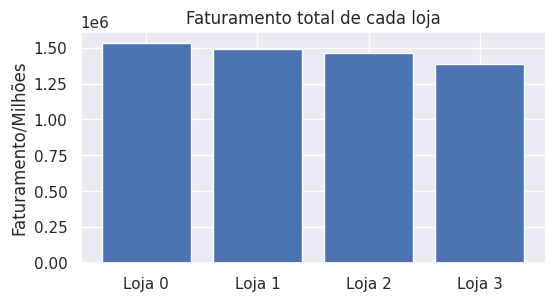

Nesse primeiro momento vimos que a " Loja 0 " teve um desempenho superior e com uma diferença considerável das outras lojas, em contrapartida a " Loja 3 " teve o menor faturamento entre as lojas demostrando assim um problema visível nas vendas já que a diferença entre ela e sua antecessora foi de quase R$ 100,000.00 .

---

# Vendas por Categoria

### Loja 0

Categoria do Produto | Quantidade de Vendas

	moveis             |  465
	eletronicos        |  448
	brinquedos         |  324
	eletrodomesticos   |  312
	esporte e lazer    |  284
	instru. musicais   |  182
	livros             |  173
	utili. domesticas  |  171

### Loja 1

Categoria do Produto |	Quantidade de Vendas

	moveis             |  442
	eletronicos        |  422
	brinquedos         |  313
	eletrodomesticos   |  305
	esporte e lazer    |  275
	instru. musicais   |  224
	livros             |  197
	utili. domesticas  |  181

### Loja 2

Categoria do Produto |	Quantidade de Vendas

	moveis             |  499
	eletronicos        |  451
	brinquedos         |  315
	eletrodomesticos   |  278
	esporte e lazer    |  277
	livros             |  185
	instru. musicais   |  177
	utili. domesticas  |  177

### Loja 3

Categoria do Produto |	Quantidade de Vendas

	moveis             |  480
	eletronicos        |  451
	brinquedos         |  338
	esporte e lazer    |  277
	eletrodomesticos   |  254
	utili. domesticas  |  201
	livros             |  187
	instru. musicais   |  170


Vemos aqui que as 4(quatro) lojas tiveram 3(três) categorias mais vendidas as quais foram:

1. Móveis
2. Eletrônicos
3. Brinquedos

As lojas que mais venderam em cada categoria foram:

1. Móveis - Loja 2
2. Eletrônicos - Loja 2 e Loja 3
3. Brinquedos - Loja 3

Segue abaixo o gráfico das vendas das lojas.

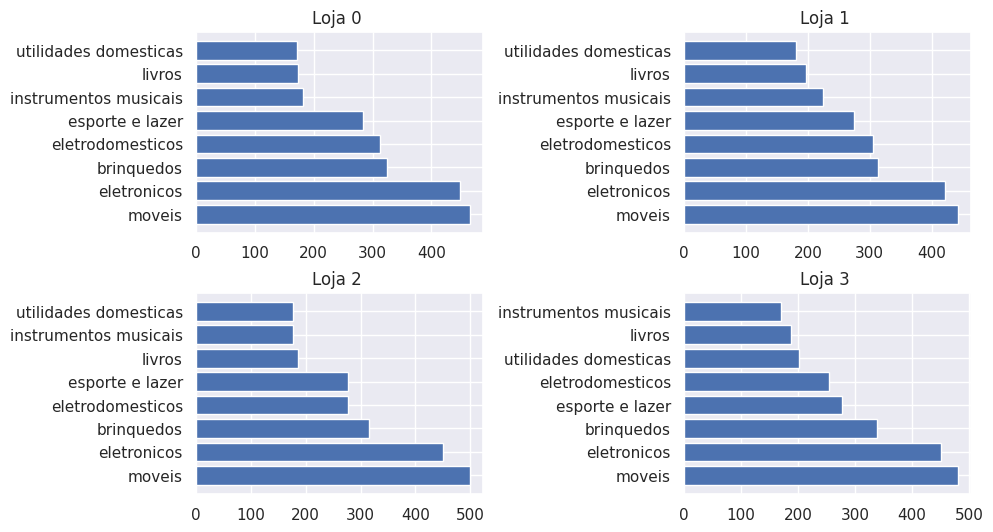

---

# **Avaliação**

Seguimos aqui com a avaliação dos clientes em relação as lojas.

1. Loja 0 = 3.98
2. Loja 1 = 4.04
3. Loja 2 = 4.05
4. Loja 3 = 4

Aqui podemos ver que apesar da "Loja 0" ter o maior faturamento, foi a loja com a pior nota, tal nota pode ser reflexivo de alguns possíveis motivos podendo ser:

* Mal suporte
* Problemas com a garantia dos produtos
* Demora em responder clientes
* Lentidão nos processos

Com base nessas suposições uma avaliação no processo de vendas da "Loja 0" é necessária para uma melhora nas suas avaliações.

---

# **Produtos Mais e Menos Vendidos**

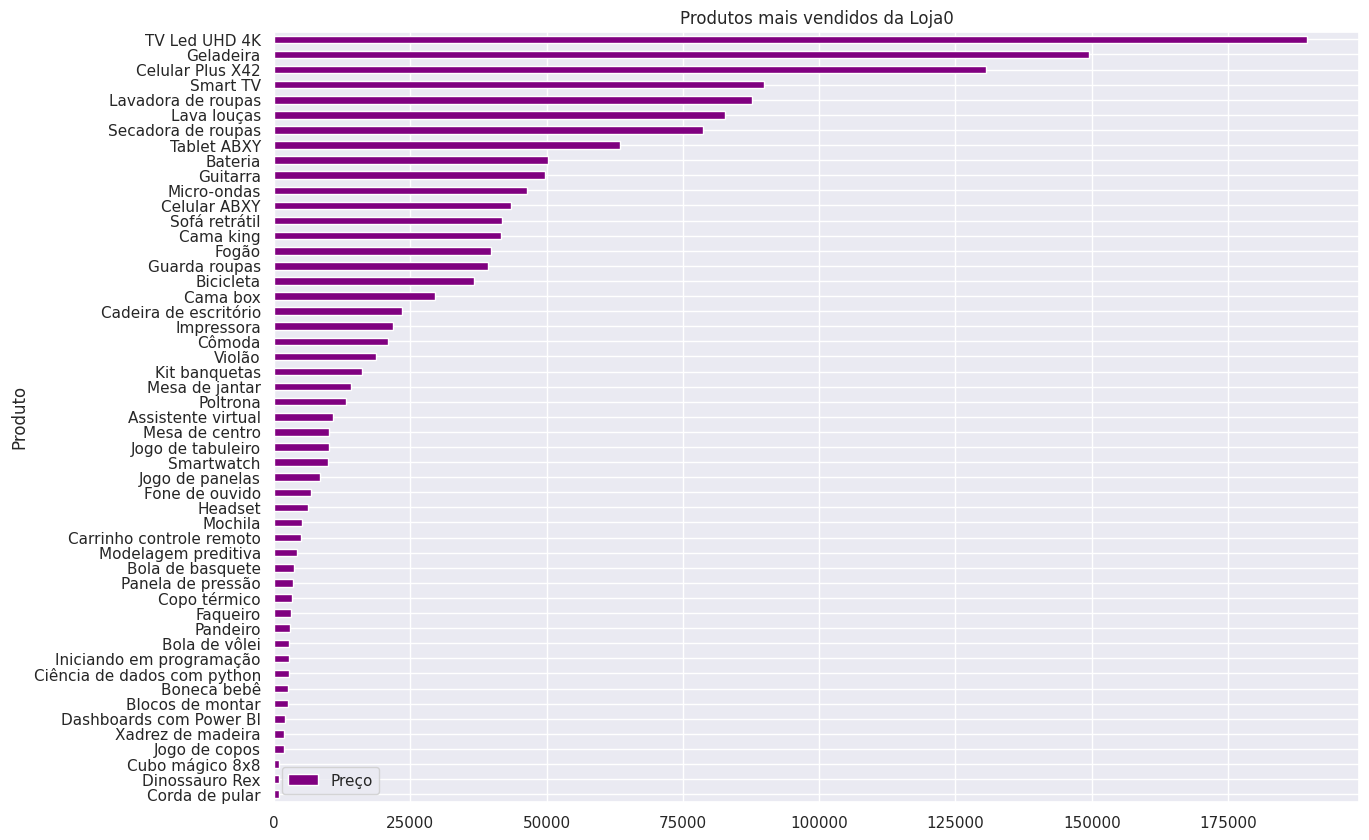


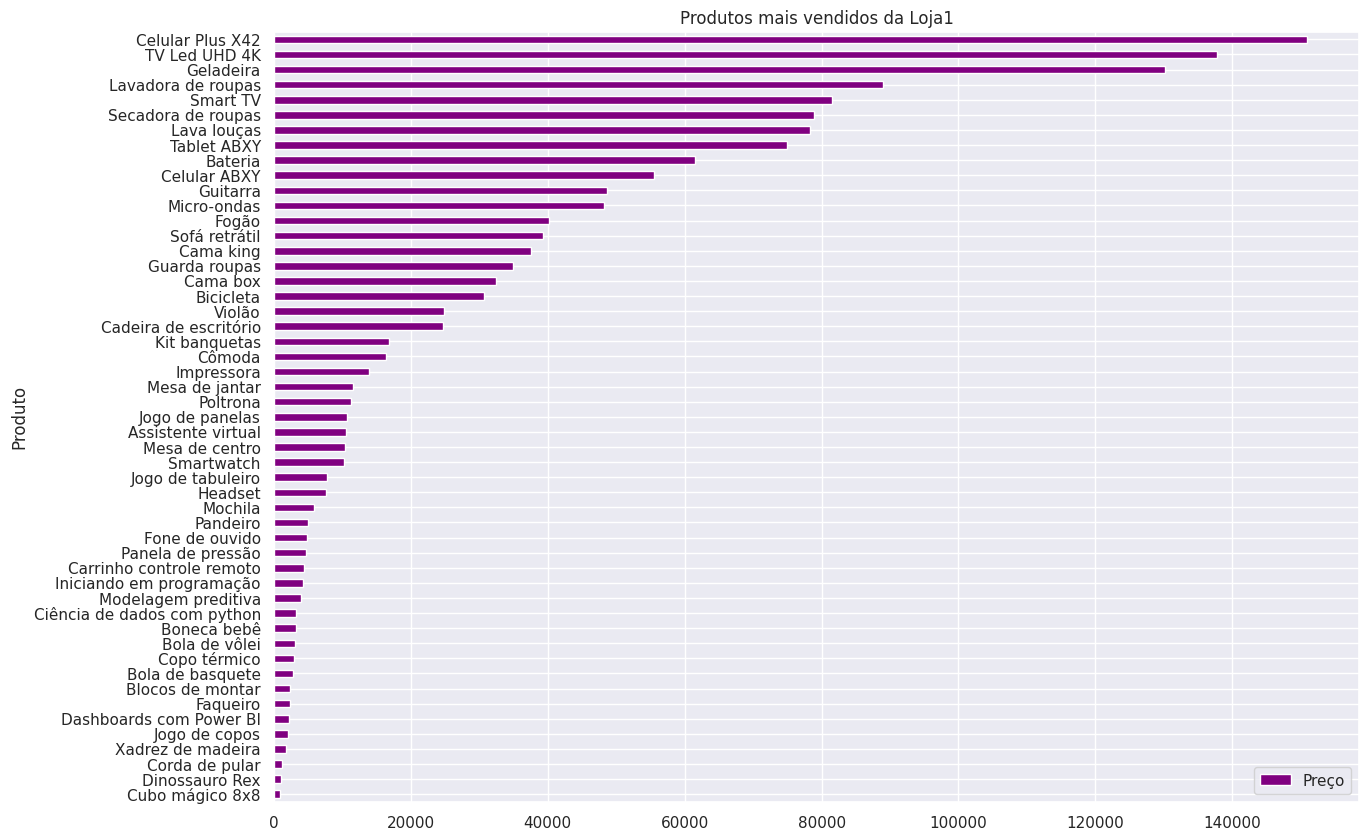


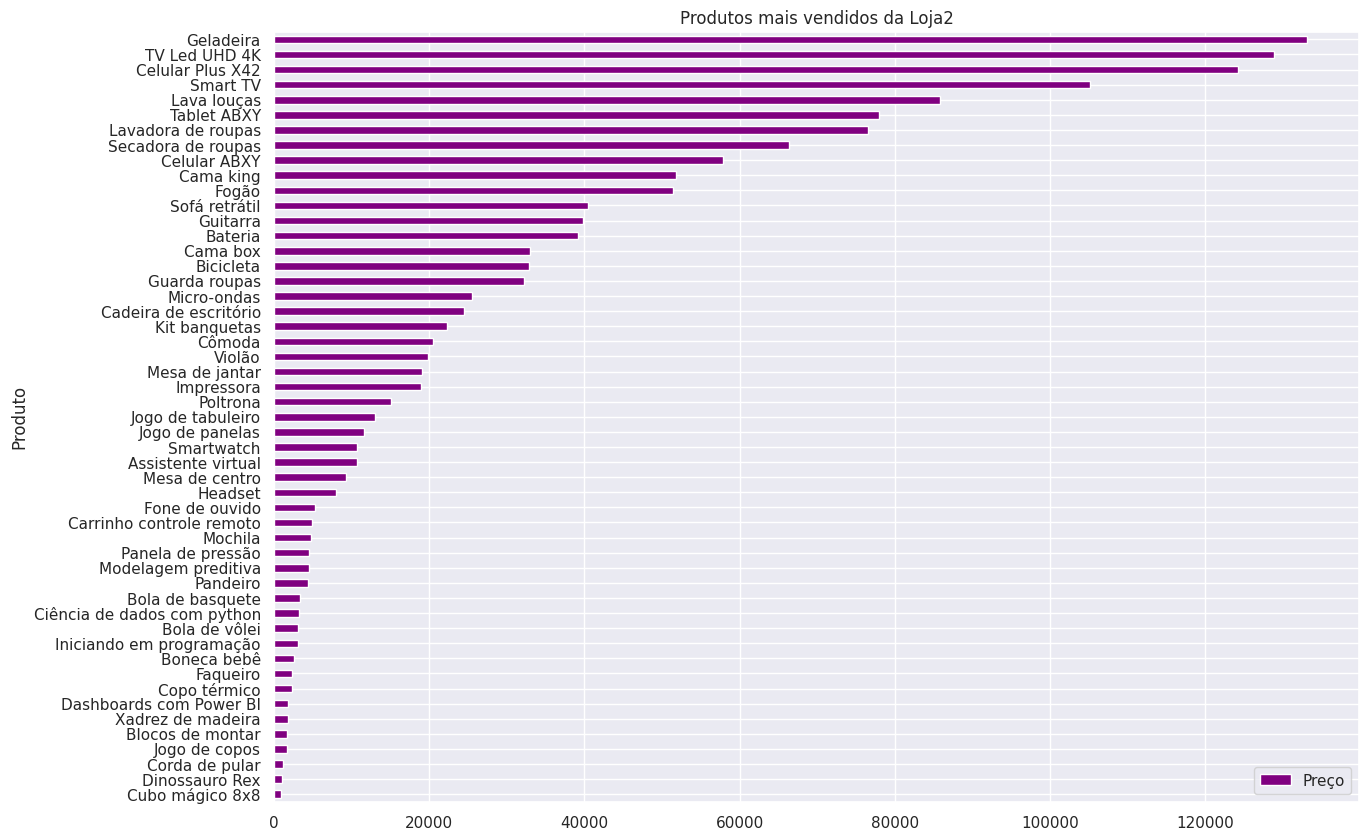


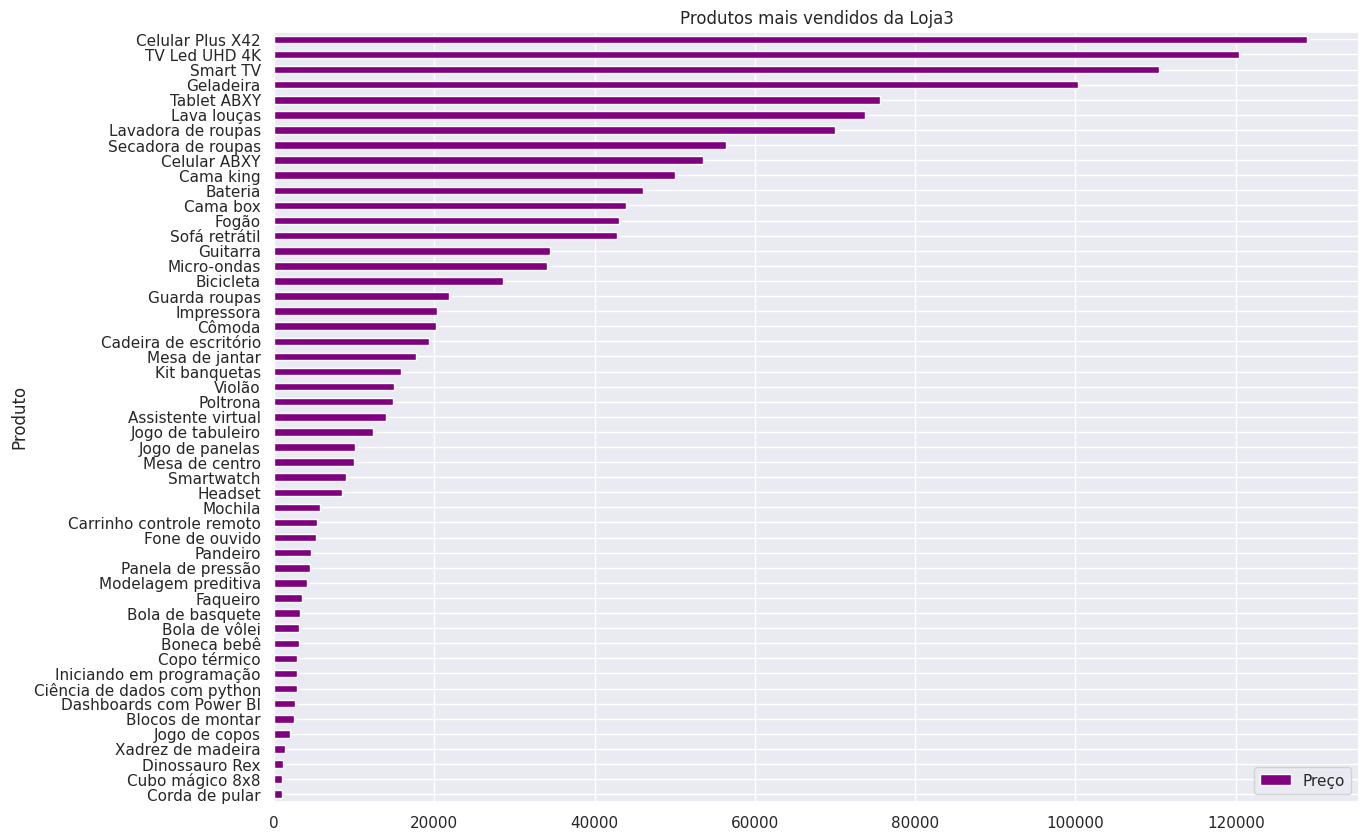

Ns gráficos acima vemos com exatidão quais produtos foram mais vendidos e os menos vendidos de cada loja.

No quais os 3(três) objetos **mais** vendidos de cada loja foram:

1. Loja 0
  * TV Led UHD 4k
  * Geladeira
  * Celular Plus X42

2. Loja 1
  * Celular Plus X42
  * TV Led UHD 4K
  * Geladeira

3. Loja 2
  * Geladeira
  * TV Led UHD 4K
  * Celular Plus X42

4. Loja 3
  * Celular Plus X42
  * TV Led UHD 4K
  * Smart TV

Enquanto os **menos** vendidos de cada loja foram:

1. Loja 0
  * Cubo Mágico 8x8
  * Dinossauro Rex
  * Corda de Pular

2. Loja 1
  * Corda de Pular
  * Dinossauro Rex
  * Cubo Mágico 8x8

3. Loja 2
  * Corda de Pular
  * Dinossauro Rex
  * Cubo Mágico 8x8

4. Loja 3
  * Dinossauro Rex
  * Cubo Mágico 8x8
  * Corda de Pular

Com base nessas informações o corte nas vendas dos itens "Corda de Pular", "Cubo Mágico 8x8" e "Dinossauro Rex", para evitar prejuízos.

---

# **Frete**

Aqui temos a parte da média dos fretes de cada loja.

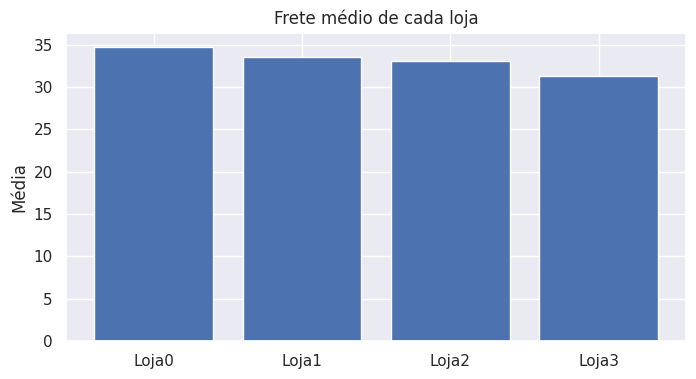

Onde precisamente temos os seguintes valores:

* Loja 0 R$ 34.69

* Loja 1 R$ 33.62

* Loja 2 R$ 33.07

* Loja 3 R$ 31.28

---

# **Conclusão**

Com base nas informações apresentadas e visando a venda apenas para conseguir fundos para o Sr. João abrir um novo negócio.
A loja 0 é a que deve ser vendida pelos seguintes motivos:

* Maior faturamento
* Vendas parecidas com as outras lojas
* Maior frete
* Menor Avaliação

Esses motivos são válidos pelas seguintes razões:

* Maior valor adquirido pela venda
* Não perderá nenhuma estratégia de venda
* Não terá mais o maior custo de frete da franquia
* Elevação do status da franquia, pois não terá mais nenhuma loja com a nota abaixo de 4

